<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/Homework%204/HW_4_Solutions_nacho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMULATION HOMEWORK 4

## Due: To Nacho on Monday, June 6, 2022

## Name: **Answer Key**

## Overall score: **??** / 35 pts

This homework will be a little different from the other three.  You job will be to recreate the figures in the *Non-Monotonicity, Chaos, and Combat Modeling* and *A Study of Non-Monotonicity and Randomnes in Combat Models*.  Modify as needed the code below that I showed in class for each of the problems. Provide your code with each problem, discuss what you changed, and the result.

## Nacho's notes
* The changes are always made inside the `one_*_battle()` functions. The plotting code is the same for each of the Lucas figures.
* Each figure (really each call to `find_blue_win_probs()`) took me about 1.5 - 6.5 minutes to generate. The later figures (with more randomness) took closer to 6.5; the earlier took closer to 1.5.
* Any time you see `np.abs(i-1)`, I'm using it to refer to the "other" side. That math turns `0 -> 1` and `1 -> 0`.
* I developed this code independently from Bart's version; I use dictionaries. Nonetheless, I'm providing this as an alternative formulation, and it is the code I used to compare my graphs against yours :).

#### 1.	[5 points] Recreate Figure 3 from *Non-Monotonicity, Chaos, and Combat Modeling*.  Note that the parameters for their figures are given in Table B.1 on page 52. Make sure the increments in initial force strengths are 10 (not 1 or prepare for a loooong wait). Even with increments of 10, it took about 15 minutes on my computer to calculate all of the points. Use a circular marker with size 1 in your plot so you can see the monotonicities.

Put description of changes here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

b_reinf_fr = 4
r_reinf_fr = 2.5
b_reinf_pct = 0.8
r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

b_withdraw_fr = 10
r_withdraw_fr = 1.5
b_withdraw_pct = 0.7
r_withdraw_pct = 0.7


def threshold_exceeded(fr, pct, fr_thresh, pct_thresh, is_max = False):
    if is_max: # x >= y equivalent to -x <= -y
        fr *= -1
        fr_thresh *= -1

    return fr <= fr_thresh or pct < pct_thresh

def reinfs_pending(d):
    return 'reinfs_arrive' in d




def one_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': r_reinf_fr,
       'reinf_pct': r_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': r_withdraw_fr,
       'withdraw_pct': r_withdraw_pct}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': b_reinf_fr,
       'reinf_pct': b_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': b_withdraw_fr,
       'withdraw_pct': b_withdraw_pct}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']
    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            if battle_ongoing:
                s['curr_strength'] -= s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1

        period += 1

    return loser

one_battle(2000)
        


0

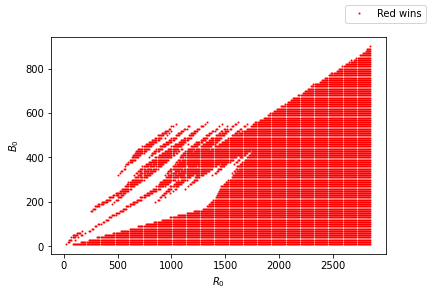

In [3]:
r0s = np.arange(10, 2851, 10)
b0s = np.arange(10, 1001, 10)

# Combinations where red wins
rs, bs = zip(*[(r0, b0) for r0 in r0s for b0 in b0s if one_battle(r0, b0) == 1])

fig, ax = plt.subplots()

ax.plot(rs, bs, 'or', markersize=1, label='Red wins')
ax.set_xlabel(r'$R_0$')
ax.set_ylabel(r'$B_0$')

fig.legend() 
fig.show()

The following table summarizes the parameter variations for figures 1-6 in *A Study of Non-Monotonicity and Randomness in Combat Models*.

| Parameter | Figure 1  | Figure 2 | Figure 3 | Figure 4 | Figure 5 | Figure 6 |
| --------  | -------- | -------- | -------- | -------- | -------- | ------ |
| Red force ratio reinforcement threshold | 2.5 | $U(2.375, 2.625)$ | $U(2, 3)$ | 2.5 | 2.5 | $U(2, 3)$ |
| Red force strength reinforcement threshold | 0.8 | $U(0.76, 0.84)$ | $U(0.64, 0.96)$ | 0.8 | 0.8 | $U(0.64, 0.96)$ |
| Blue force ratio reinforcement threshold | 4 | $U(3.8, 4.2)$ | $U(3.2, 4.8)$ | 4 | 4 | $U(3.2, 4.8)$ |
| Blue force strength reinforcement threshold | 0.8 | $U(0.76, 0.84)$ | $U(0.64, 0.96)$ | 0.8 | 0.8 | $U(0.64, 0.96)$ |
| Red force ratio withdraw threshold | 1.5 | $U(1.425, 1.575)$ | $U(1.2, 1.8)$ | 1.5 | 1.5 | $U(1.2, 1.8)$ |
| Red force strength withdraw threshold | 0.7 | $U(0.665, 0.735)$ | $U(0.56, 0.84)$ | 0.7 | 0.7 | $U(0.56, 0.84)$ |
| Blue force ratio withdraw threshold | 10 | $U(9.5, 10.5)$ | $U(8, 12)$ | 10 | 10 | $U(8, 12)$ |
| Blue force strength withdraw threshold | 0.7 | $U(0.665, 0.735)$ | $U(0.56, 0.84)$ | 0.7 | 0.7 | $U(0.56, 0.84)$ |
| Red attrition factor threshold | 2048 | 2048 | 2048 | $N(2048, 4.525)$ | $N(2048, 45.255)$ | $N(2048, 45.255)$ |
| Blue attrition factor threshold | 512 | 512 | 512 | $N(512, 2.263)$ | $N(512, 22.627)$ | $N(512, 22.627)$ |

Replicate Figure 1-6 from Tom Lucas’ A Study of Non-Monotonicity and Randomness in Combat Models.  The initial blue forces are 500.  The initial red forces vary from 500 to 3,000 in steps of 10. To reduce the time required to produce these plots from “crazy long” to just “very long,” use 100 replications rather than the 1,000 that Tom used. Use the values or distributions for the parameters associated with each figure as give in the table below. Your figures, of course, will have greater variance, but should have an overall trend that replicates his figures, except for figure 5.  I don’t know how he got that figure, but my calculations yield something different.  Caution!  It took me between 30 and 60 minutes to create each of these figures.  So, after you hit the “run” button, do OJT, answer email, talk to your family or friends, check your social media, put on a good movie, etc.

#### 2.	[5 points] Recreate Figure 1.

Put description of changes here.

In [4]:
## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

b_reinf_fr = 4
r_reinf_fr = 2.5
b_reinf_pct = 0.8
r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

b_withdraw_fr = 10
r_withdraw_fr = 1.5
b_withdraw_pct = 0.7
r_withdraw_pct = 0.7

def one_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': r_reinf_fr,
       'reinf_pct': r_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': r_withdraw_fr,
       'withdraw_pct': r_withdraw_pct}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': b_reinf_fr,
       'reinf_pct': b_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': b_withdraw_fr,
       'withdraw_pct': b_withdraw_pct}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']
    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            if battle_ongoing:
                s['curr_strength'] -= s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1

        period += 1

    return loser

one_battle(2000)
        


0

In [5]:
r0s = np.arange(800, 1801, 10)
b0 = 500
reps = 100

def find_blue_win_probs(r0s, b0, battle_func, reps):
    blue_win_probs = np.empty_like(r0s, dtype=float)
    for i, r0 in enumerate(r0s):
        losers = np.array([battle_func(r0, b0) for _ in range(reps)])
        winners = np.abs(losers - 1) # 1 -> 0; 0 -> 1
        blue_win_probs[i] = np.mean(winners)

    return blue_win_probs

blue_win_probs = find_blue_win_probs(r0s, b0, one_battle, reps)

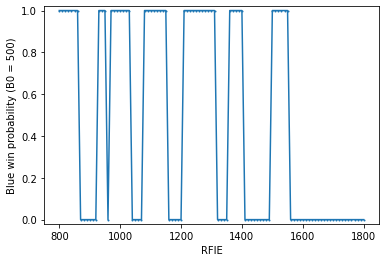

In [6]:
fig, ax = plt.subplots()

ax.plot(r0s, blue_win_probs, 'o-', markersize=1)
ax.set_xlabel('RFIE')
ax.set_ylabel('Blue win probability (B0 = {})'.format(b0))
ax.set_ylim(-0.02, 1.02)

fig.show()

#### 3. [5 points] Recreate Figure 2.

The constant parameter values are commented out, and the `red` and `blue` dictionary entries are changed to reflect the random values.

In [7]:
from numpy.random import default_rng

rng = default_rng()

## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

# b_reinf_fr = 4
# r_reinf_fr = 2.5
# b_reinf_pct = 0.8
# r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

# b_withdraw_fr = 10
# r_withdraw_fr = 1.5
# b_withdraw_pct = 0.7
# r_withdraw_pct = 0.7

def one_random_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': rng.uniform(2.375, 2.625),
       'reinf_pct': rng.uniform(0.76, 0.84),
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': rng.uniform(1.425, 1.575),
       'withdraw_pct': rng.uniform(0.665, 0.735)}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': rng.uniform(3.8, 4.2),
       'reinf_pct': rng.uniform(0.76, 0.84),
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': rng.uniform(9.5, 10.5),
       'withdraw_pct': rng.uniform(0.665, 0.735)}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']
    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            if battle_ongoing:
                s['curr_strength'] -= s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1

        period += 1

    return loser

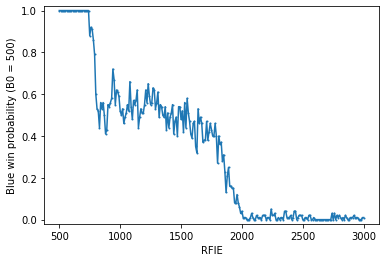

In [8]:
r0s = np.arange(500, 3001, 10)
b0 = 500
reps = 100

blue_win_probs = find_blue_win_probs(r0s, b0, one_random_battle, reps)

fig, ax = plt.subplots()

ax.plot(r0s, blue_win_probs, 'o-', markersize=1)
ax.set_xlabel('RFIE')
ax.set_ylabel('Blue win probability (B0 = {})'.format(b0))
ax.set_ylim(-0.02, 1.02)

fig.show()

#### 4. [5 points] Recreate Figure 3.

Same as Figure 2, except new values for the random variables.

In [9]:
## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

# b_reinf_fr = 4
# r_reinf_fr = 2.5
# b_reinf_pct = 0.8
# r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

# b_withdraw_fr = 10
# r_withdraw_fr = 1.5
# b_withdraw_pct = 0.7
# r_withdraw_pct = 0.7

def one_random_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': rng.uniform(2, 3),
       'reinf_pct': rng.uniform(0.64, 0.96),
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': rng.uniform(1.2, 1.8),
       'withdraw_pct': rng.uniform(0.56, 0.84)}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': rng.uniform(3.2, 4.8),
       'reinf_pct': rng.uniform(0.64, 0.96),
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': rng.uniform(8, 12),
       'withdraw_pct': rng.uniform(0.56, 0.84)}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']
    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            if battle_ongoing:
                s['curr_strength'] -= s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1

        period += 1

    return loser

In [10]:
r0s = np.arange(500, 3001, 10)
b0 = 500
reps = 100

blue_win_probs = find_blue_win_probs(r0s, b0, one_random_battle, reps)

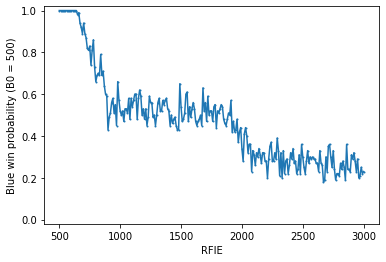

In [11]:
fig, ax = plt.subplots()

ax.plot(r0s, blue_win_probs, 'o-', markersize=1)
ax.set_xlabel('RFIE')
ax.set_ylabel('Blue win probability (B0 = {})'.format(b0))
ax.set_ylim(-0.02, 1.02)

fig.show()

#### 5. [5 points] Recreate Figure 4.

Restoring the constants from Figure 1. Changing the attrition code to use the Dewar equation as the mean, and 10% of that as the standard deviation, to obtain a random value for the number attrited each time step per side.

In [12]:
## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

b_reinf_fr = 4
r_reinf_fr = 2.5
b_reinf_pct = 0.8
r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

b_withdraw_fr = 10
r_withdraw_fr = 1.5
b_withdraw_pct = 0.7
r_withdraw_pct = 0.7

def one_attrition_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': r_reinf_fr,
       'reinf_pct': r_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': r_withdraw_fr,
       'withdraw_pct': r_withdraw_pct}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': b_reinf_fr,
       'reinf_pct': b_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': b_withdraw_fr,
       'withdraw_pct': b_withdraw_pct}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']

    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            ## CHANGED
            if battle_ongoing:
                attrit_mean = s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1
                s['curr_strength'] -= max(0, rng.normal(attrit_mean, 0.1*np.sqrt(attrit_mean)))
                
        period += 1

    return loser

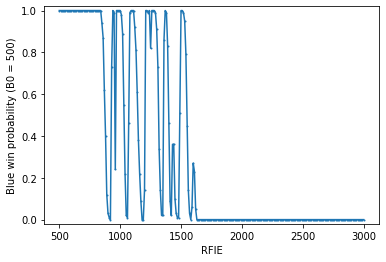

In [13]:
r0s = np.arange(500, 3001, 10)
b0 = 500
reps = 100

blue_win_probs = find_blue_win_probs(r0s, b0, one_attrition_battle, reps)

fig, ax = plt.subplots()

ax.plot(r0s, blue_win_probs, 'o-', markersize=1)
ax.set_xlabel('RFIE')
ax.set_ylabel('Blue win probability (B0 = {})'.format(b0))
ax.set_ylim(-0.02, 1.02)

fig.show()

Put description of changes here.

#### 6. [5 points] Recreate Figure 5.

Same as Figure 4, but adjusting the standard deviation by no longer multiplying by 10%.

In [14]:
## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

b_reinf_fr = 4
r_reinf_fr = 2.5
b_reinf_pct = 0.8
r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

b_withdraw_fr = 10
r_withdraw_fr = 1.5
b_withdraw_pct = 0.7
r_withdraw_pct = 0.7

def one_attrition_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': r_reinf_fr,
       'reinf_pct': r_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': r_withdraw_fr,
       'withdraw_pct': r_withdraw_pct}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': b_reinf_fr,
       'reinf_pct': b_reinf_pct,
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': b_withdraw_fr,
       'withdraw_pct': b_withdraw_pct}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']

    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            if battle_ongoing:
                attrit_mean = s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1
                s['curr_strength'] -= max(0, rng.normal(attrit_mean, np.sqrt(attrit_mean)))
                
        period += 1

    return loser

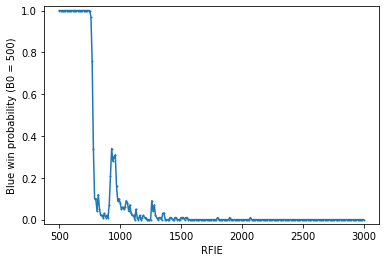

In [15]:
r0s = np.arange(500, 3001, 10)
b0 = 500
reps = 100

blue_win_probs = find_blue_win_probs(r0s, b0, one_attrition_battle, reps)

fig, ax = plt.subplots()

ax.plot(r0s, blue_win_probs, 'o-', markersize=1)
ax.set_xlabel('RFIE')
ax.set_ylabel('Blue win probability (B0 = {})'.format(b0))
ax.set_ylim(-0.02, 1.02)

fig.show()

#### 7. [5 points] Recreate Figure 6.

Combination of random thresholds from Figure 3, and random attrition from Figure 5.

In [16]:
## Parameters
r0 = 2000
b0 = 839

b_attrit_coef = 1/2048
r_attrit_coef = 1/512

# b_reinf_fr = 4
# r_reinf_fr = 2.5
# b_reinf_pct = 0.8
# r_reinf_pct = 0.8

reinf_size = 300
reinf_batches = 5
reinf_delay = 70

# b_withdraw_fr = 10
# r_withdraw_fr = 1.5
# b_withdraw_pct = 0.7
# r_withdraw_pct = 0.7

def one_random_attrition_battle(r0=r0, b0=b0):
    red = {'init_strength': r0,
       'attrit_coef': r_attrit_coef,
       'reinf_fr': rng.uniform(2, 3),
       'reinf_pct': rng.uniform(0.64, 0.96),
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': rng.uniform(1.2, 1.8),
       'withdraw_pct': rng.uniform(0.56, 0.84)}

    blue = {'init_strength': b0,
       'attrit_coef': b_attrit_coef,
       'reinf_fr': rng.uniform(3.2, 4.8),
       'reinf_pct': rng.uniform(0.64, 0.96),
       'reinf_size': reinf_size,
       'reinf_batches': reinf_batches,
       'reinf_delay': reinf_delay,
       'withdraw_fr': rng.uniform(8, 12),
       'withdraw_pct': rng.uniform(0.56, 0.84)}

    sides = np.array([red, blue])
    period = 0
    battle_ongoing = True
    for s in sides:
        s['curr_strength'] = s['init_strength']
    ## Paper describes order:
    ## Call for reinforcements > Reinforce units > Check for withdrawal > Attrit
    while battle_ongoing:
        fr_red_to_blue = sides[0]['curr_strength'] / sides[1]['curr_strength']
        for i, s in enumerate(sides):
            pct = s['curr_strength']/s['init_strength']
            ## Determine if reinforcements are needed
            if s['reinf_batches'] > 0 and not reinfs_pending(s) and \
                    threshold_exceeded(fr_red_to_blue, pct, s['reinf_fr'], 
                                       s['reinf_pct'], is_max = i):
                s['reinf_batches'] -= 1
                s['reinfs_arrive'] = period + s['reinf_delay']
                assert reinfs_pending(s), 'Reinforcements are not pending'

            ## Add reinforcements
            if reinfs_pending(s) and period >= s['reinfs_arrive']:
                s['curr_strength'] += s['reinf_size']
                del s['reinfs_arrive']
                assert not reinfs_pending(s), 'Reinforcements are still pending'

            ## Check for withdrawal
            if threshold_exceeded(fr_red_to_blue, pct, s['withdraw_fr'], 
                                  s['withdraw_pct'], is_max=i):
                battle_ongoing = False
                loser = i
                break
            
            ## Attrit
            if battle_ongoing:
                attrit_mean = s['attrit_coef']*sides[np.abs(i-1)]['curr_strength'] # 1 -> 0; 0 -> 1
                s['curr_strength'] -= max(0, rng.normal(attrit_mean, np.sqrt(attrit_mean)))            

        period += 1

    return loser

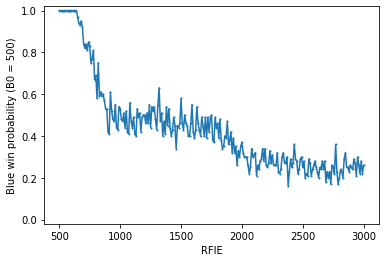

In [17]:
r0s = np.arange(500, 3001, 10)
b0 = 500
reps = 100

blue_win_probs = find_blue_win_probs(r0s, b0, one_random_attrition_battle, reps)

fig, ax = plt.subplots()

ax.plot(r0s, blue_win_probs, 'o-', markersize=1)
ax.set_xlabel('RFIE')
ax.set_ylabel('Blue win probability (B0 = {})'.format(b0))
ax.set_ylim(-0.02, 1.02)

fig.show()